# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
url

units = "metric"


In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&q={city}&appid={weather_api_key}"
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weatherResponse = requests.get(city_url)
        city_weather = weatherResponse.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=metric&q=babanusah&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 1 of Set 1 | babanusah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=metric&q=bandarbeyla&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 2 of Set 1 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=metric&q=brownwood&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 3 of Set 1 | brownwood
http://api.openweathermap.org/data/2.5/weather?units=metric&q=mataura&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 4 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=metric&q=atuona&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 5 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=metric&q=taolanaro&appid=5b9da8e8c567a95d9431caf151313eea
Processing Record 6 of Set 1 | taolanaro
City n

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bandarbeyla,9.4942,50.8122,27.86,71,100,4.56,SO,1682635322
1,brownwood,31.7093,-98.9912,24.62,37,0,2.06,US,1682635322
2,mataura,-46.1927,168.8643,11.38,78,18,0.25,NZ,1682635322
3,atuona,-9.8000,-139.0333,27.33,76,28,4.40,PF,1682635323
4,bambous virieux,-20.3428,57.7575,24.01,88,20,1.03,MU,1682635323


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("outputdata/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("outputdata/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandarbeyla,9.4942,50.8122,27.86,71,100,4.56,SO,1682635322
1,brownwood,31.7093,-98.9912,24.62,37,0,2.06,US,1682635322
2,mataura,-46.1927,168.8643,11.38,78,18,0.25,NZ,1682635322
3,atuona,-9.8000,-139.0333,27.33,76,28,4.40,PF,1682635323
4,bambous virieux,-20.3428,57.7575,24.01,88,20,1.03,MU,1682635323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

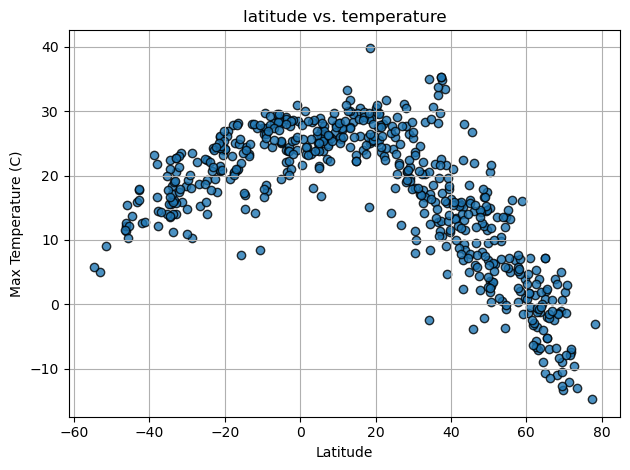

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"latitude vs. temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("outputdata/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

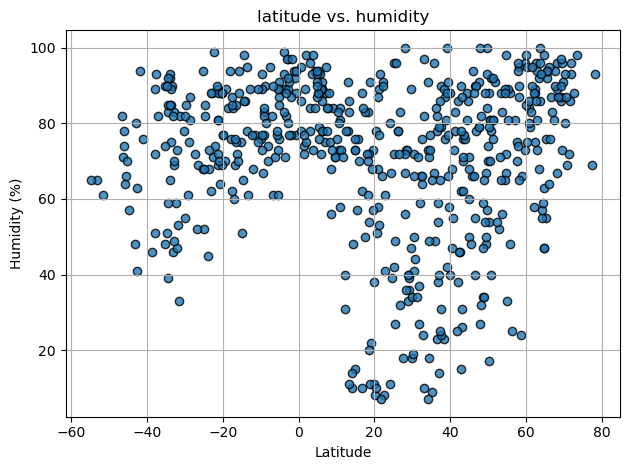

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"latitude vs. humidity")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("outputdata/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

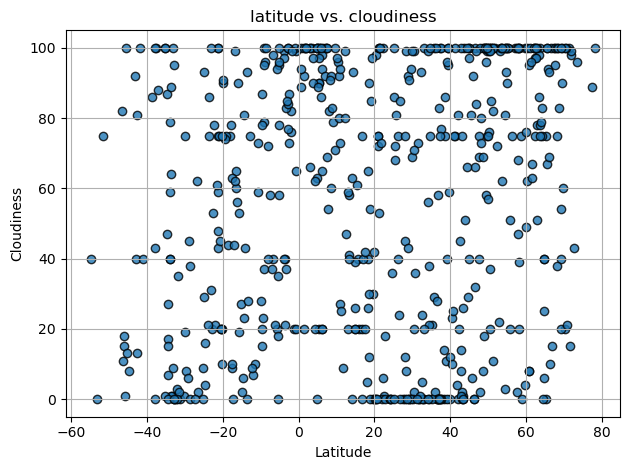

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"latitude vs. cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("outputdata/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

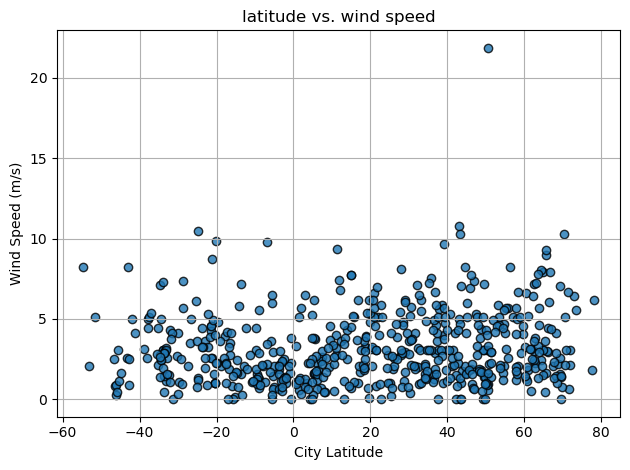

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"latitude vs. wind speed")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("outputdata/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandarbeyla,9.4942,50.8122,27.86,71,100,4.56,SO,1682635322
1,brownwood,31.7093,-98.9912,24.62,37,0,2.06,US,1682635322
5,jamestown,42.0970,-79.2353,15.80,38,0,4.12,US,1682635024
6,tuktoyaktuk,69.4541,-133.0374,-9.00,73,100,0.00,CA,1682635324
7,khromtau,50.2503,58.4347,14.95,54,100,3.05,KZ,1682635324


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mataura,-46.1927,168.8643,11.38,78,18,0.25,NZ,1682635322
3,atuona,-9.8000,-139.0333,27.33,76,28,4.40,PF,1682635323
4,bambous virieux,-20.3428,57.7575,24.01,88,20,1.03,MU,1682635323
9,dzaoudzi,-12.7887,45.2699,27.94,89,75,2.06,YT,1682635325
10,avarua,-21.2078,-159.7750,26.03,69,100,2.57,CK,1682635316


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.853902519008625


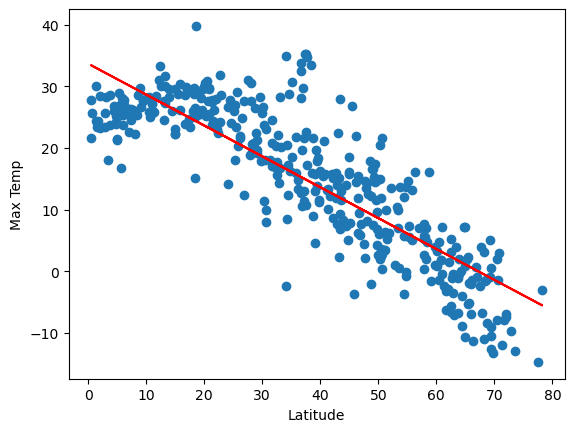

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'r-value = {rvalue}')

The r-value is 0.7221180351646418


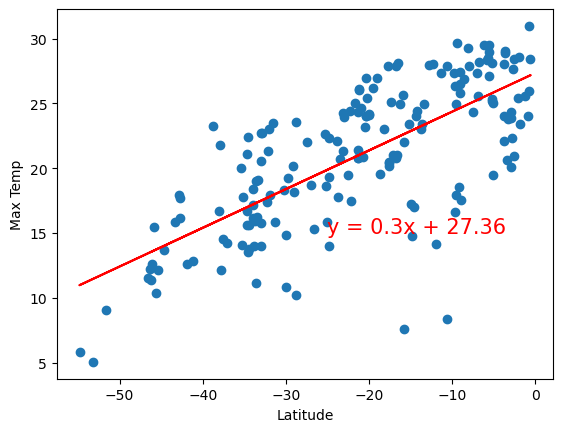

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** There is a linear relationship in both the northern and hemisphere based on the latitude and maximum temperature. In both hemispheres, as the latitude gets closer to 0, or the equator, the max temperature increases. The opposite also appears to be true. 

### Humidity vs. Latitude Linear Regression Plot

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

In [24]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE